**Bank Marketing Data Set Classification**

Load dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/bank/bank.csv', sep=';')
print('Load data into dataframe! :)')

Load data into dataframe! :)


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [6]:
df.shape

(4521, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Train data:

In [9]:
print(df.isnull().sum(),"\n")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64 



Replace y column value:

In [10]:
df['y'] = df.y.replace({"yes":1,"no":0})

In [11]:
#stored column with type object to new variable
cat = [n for n in df.columns if df[n].dtypes == 'object']

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


analyse variable 'y' to check data imbalance

Percentage of no subscription:  88.47600088476001
Percentage of subscription:  11.523999115239992


<AxesSubplot:>

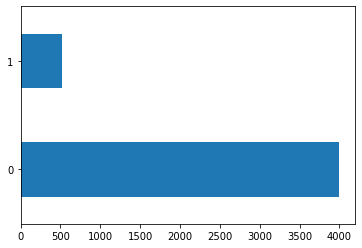

In [14]:
%matplotlib inline

import matplotlib as mpl 
import matplotlib.pyplot as plt

all_row = len(df)
no_sub = len(df[df['y'] == 0])
sub = len(df[df['y'] == 1])

perc_no_sub = (no_sub/all_row)*100
perc_sub = (sub/all_row)*100

print('Percentage of no subscription: ', perc_no_sub)
print('Percentage of subscription: ', perc_sub)

df['y'].value_counts().plot(kind='barh')


As a result of the analysis and seen in the diagram, majority of the data is no subscription that accounted for about 88%. The dependent variable is no_sub.

**Visualisation**

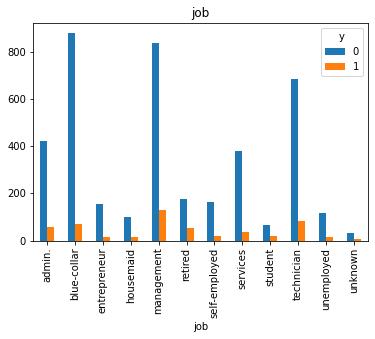

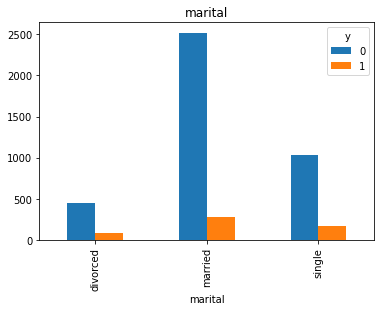

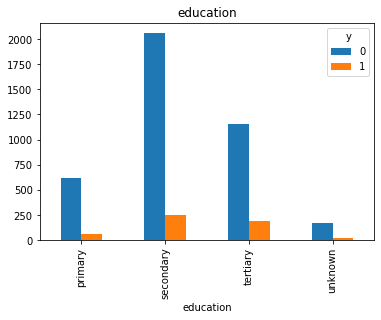

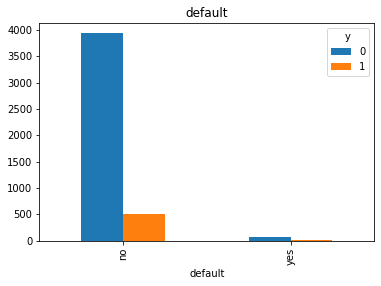

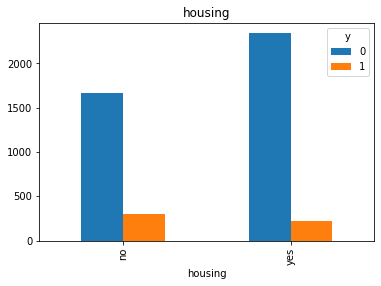

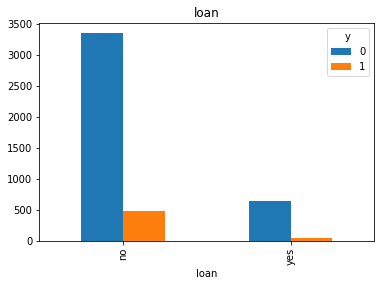

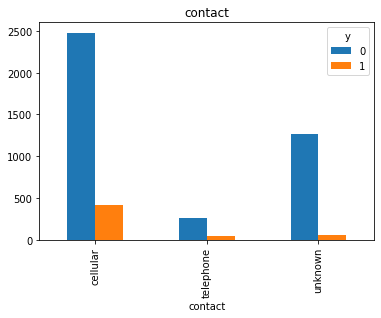

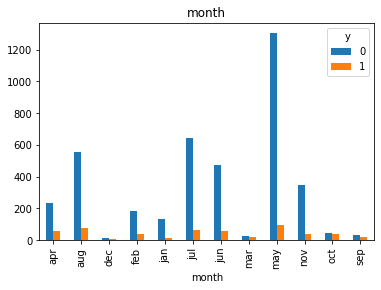

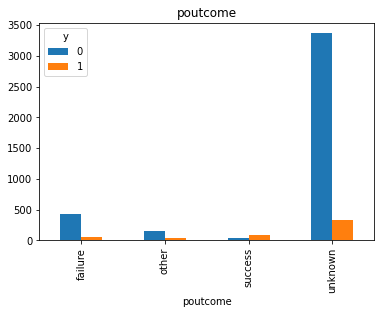

In [15]:
for col in cat:
    pd.crosstab(df[col], df.y).plot(kind='bar')
    plt.title(col)

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [16]:
df['pdays'].value_counts()

-1      3705
 182      23
 183      20
 92       12
 363      12
        ... 
 158       1
 162       1
 206       1
 210       1
 871       1
Name: pdays, Length: 292, dtype: int64

In [18]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [22]:
# replace contact with value
df['contact'] = df.contact.replace({"cellular": 1,"unknown": 0,"telephone": 2})

In [31]:
df = pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','month','poutcome'],drop_first = True)

In [32]:
df.head()

,age,balance,contact,day,duration,campaign,pdays,previous,y,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,1,19,79,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,1,11,220,1,339,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,1,16,185,1,330,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,0,3,199,4,-1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,5,226,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df.shape

(4521, 42)

In [37]:
from sklearn.model_selection import train_test_split

x = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size=0.2)

print('x train: ',len(x_train))
print('x test: ',len(x_cv))
print('y train: ',len(y_train))
print('y test: ',len(y_cv))

x train:  3616
x test:  905
y train:  3616
y test:  905


**LOGISTIC REGRESSION**

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred_cv = model.predict(x_cv)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_cv,pred_cv))
matrix = confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8364640883977901
[[754  40]
 [108   3]]


**K-NEAREST NEIGHBORS**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv1=kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv1))
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.881767955801105
[[769  25]
 [ 82  29]]


**SUPPORT VECTOR MACHINE**

In [41]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(x_train,y_train)
pred_cv2 = svm_model.predict(x_cv)

print(accuracy_score(y_cv,pred_cv2))
matrix2 = confusion_matrix(y_cv,pred_cv2)
print(matrix2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8773480662983425
[[794   0]
 [111   0]]


**DECISION TREE**

In [43]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_cv3 = dt.predict(x_cv)

print(accuracy_score(y_cv,pred_cv3))
matrix3 = confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.8519337016574585
[[727  67]
 [ 67  44]]


**RANDOM FOREST**

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_cv4 = rf.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4 = confusion_matrix(y_cv,pred_cv4)
print(matrix4)

/var/folders/3g/3bnv8t693_n_9kybmdbbw2380000gn/T/ipykernel_19968/1761182443.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.8861878453038674
[[778  16]
 [ 87  24]]


**NAIVE BAYES**

In [48]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
pred_cv5 = nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

0.8209944751381215
[[699  95]
 [ 67  44]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Accuracy Score**

In [52]:
print("Logistic Regression: ", accuracy_score(y_cv,pred_cv))
print("K-Nearest ", accuracy_score(y_cv,pred_cv1))
print("Support Vector Machine: ", accuracy_score(y_cv,pred_cv2))
print("Decision Tree: ", accuracy_score(y_cv,pred_cv3))
print("Random Forest: ", accuracy_score(y_cv,pred_cv4))
print("Naive Bayes: ", accuracy_score(y_cv,pred_cv5))


Logistic Regression:  0.8364640883977901
K-Nearest  0.881767955801105
Support Vector Machine:  0.8773480662983425
Decision Tree:  0.8519337016574585
Random Forest:  0.8861878453038674
Naive Bayes:  0.8209944751381215
